# Transportation forecasting - looking at mode choice
In homework 4 we looked at forecasting the number of people who would commute to an event by mode assuming that travel time is the only factor in making a travel decision. 

**Question 1:** List some of the other factors (besides travel time) that you think affect travel mode choice.

In [1]:
# Answer here


"The California Department of Transportation (Caltrans) conducts the California Household Travel Survey (CHTS) every ten years to obtain detailed information about the socioeconomic characteristics and travel behavior of households statewide." -[Caltrans website](http://www.dot.ca.gov/hq/tpp/offices/omsp/statewide_travel_analysis/chts.html)


The modechoice.csv file contains data from the CHTS on trips that people living in the bay area actually took. The dataset contains demographic info on the traveler as well as trip origin taz and destination taz. We have combined this data with the travelSkims that we used in minilabs 3 and 4 to add  trip cost, time, and distance information for all available travel modes.

Note that some modes are not available for some trips for some people - for example some people do not have a drivers license or do not have access to a car. Sometimes biking is infeasible due to bike ownership, trip distance or restrictions on biking across bridges. 

The data in modechoice.csv is as follows:
<table>
    <tr>
        <td>'observation_id'</td>   <td>int id</td>
    </tr><tr>
        <td>'choice'        </td>   <td>  string mode chosen <li>'da' - drive alone,<li>'s2' - 2 person shared ride,<li>'s3' - 3 person shared ride,<li>'wTrnW' - walk tranit walk,<li>'dTrnW' - drive transit walk,<li>'wTrnD' - walk transit drive,<li>'walk' - walk,<li>'bike' - bike </td>
    </tr><tr>
    <td> 'availability_drive_alone'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_shared_ride_2'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_shared_ride_3+'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_walk_transit_walk'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_drive_transit_walk'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_walk_transit_drive'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_walk'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_bicycle'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'household_id'</td>   <td>      int
    </tr><tr>
    <td> 'person_id'</td>   <td>              int
    </tr><tr>
    <td> 'tour_id'</td>   <td>                 int
    </tr><tr>
    <td> 'tour_origin_taz'</td>   <td>                   int taz id
    </tr><tr>
    <td> 'primary_dest_taz'</td>   <td>    int taz id
    </tr><tr>
    <td> 'age'</td>   <td>          int age in years
    </tr><tr>
    <td> 'household_size'</td>   <td>                       int, number of people
    </tr><tr>
    <td> 'household_income'</td>   <td>    int 1-8, 1 = lowest income bracket, 8=highest
    </tr><tr>
    <td> 'household_income_values'</td>   <td>         int dollar value household income
    </tr><tr>
    <td> 'transit_subsidy'</td>   <td>   1 if has subsidy, else 0
    </tr><tr>
    <td> 'transit_subsidy_amount'</td>   <td>           subsidy dollar amount
    </tr><tr>
    <td> 'cross_bay'</td>   <td>    1 if trip crosses bay, else 0
    </tr><tr>
    <td> 'total_travel_time_drive_alone'</td>   <td>    all travel times in minutes
    </tr><tr>
    <td> 'total_travel_time_shared_ride_2'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_shared_ride_3+'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_walk_transit_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_drive_transit_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_walk_transit_drive'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_bicycle'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_distance_drive_alone' </td>   <td> all travel distances in miles
    </tr><tr>
    <td> 'total_travel_distance_shared_ride_2'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_distance_shared_ride_3+'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_distance_walk'     </td>   <td> 
    </tr><tr>
    <td> 'total_travel_distance_bicycle'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_cost_drive_alone'</td>   <td> all travel costs in dollars
    </tr><tr>
    <td> 'total_travel_cost_shared_ride_2'</td>   <td> Note driving costs include fixed per mile rate divided evenly among passengers, and tolls. Does not include parking and other car ownership related costs
    </tr><tr>
    <td> 'total_travel_cost_shared_ride_3+'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_cost_walk_transit_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_cost_drive_transit_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_cost_walk_transit_drive'</td>   <td> 
    </tr><tr>
    <td> 'age_ctgry'         <td>  str age category:
                                       <li>'0-04' = 0-4 years old,
                                       <li>'05-19' = 5-19 years old, 
                                       <li>'20-44' = 20-44 years old, 
                                       <li>'45-64' = 45-64 years old, 
                                       <li>'65+' = 65+ years old, 




In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mc = Table.read_table('data/modechoice.csv')
mc

observation_id,choice,availability_drive_alone,availability_shared_ride_2,availability_shared_ride_3+,availability_walk_transit_walk,availability_drive_transit_walk,availability_walk_transit_drive,availability_walk,availability_bicycle,household_id,person_id,tour_id,tour_origin_taz,primary_dest_taz,age,household_size,household_income,household_income_values,transit_subsidy,transit_subsidy_amount,cross_bay,total_travel_time_drive_alone,total_travel_time_shared_ride_2,total_travel_time_shared_ride_3+,total_travel_time_walk_transit_walk,total_travel_time_drive_transit_walk,total_travel_time_walk_transit_drive,total_travel_time_walk,total_travel_time_bicycle,total_travel_distance_drive_alone,total_travel_distance_shared_ride_2,total_travel_distance_shared_ride_3+,total_travel_distance_walk,total_travel_distance_bicycle,total_travel_cost_drive_alone,total_travel_cost_shared_ride_2,total_travel_cost_shared_ride_3+,total_travel_cost_walk_transit_walk,total_travel_cost_drive_transit_walk,total_travel_cost_walk_transit_drive,age_ctgry
1,da,1,1,1,1,1,1,1,1,1043613,1,0,1004,969,53,2,6,87500,0,-1,0,20.97,20.97,20.97,83.56,63.05,67.29,167.6,41.9,9.1,9.1,9.1,8.38,8.38,1.6817,0.9609,0.6726,5.84,3.22,3.02,45-64
2,da,1,1,1,1,1,1,1,1,1043613,1,1,1004,969,53,2,6,87500,0,-1,0,22.16,22.16,22.16,87.38,77.79,58.01,167.6,41.9,9.1,9.1,9.1,8.38,8.38,1.6817,0.9609,0.6726,4.83,3.22,3.22,45-64
3,s2,1,1,1,1,1,1,0,0,1045607,1,0,908,116,57,1,4,42500,0,-1,1,47.98,47.98,47.98,140.63,131.49,137.39,nan,nan,31.94,31.94,31.94,nan,nan,9.1125,5.2071,3.645,6.95,7.75,5.98,45-64
4,bike,0,1,1,1,0,1,1,1,1049908,1,0,30,12,50,1,2,17500,0,-1,0,nan,15.05,15.05,26.46,nan,16.77,42.8,10.7,nan,2.23,2.23,2.14,2.14,nan,0.2355,0.1649,3.22,nan,3.22,45-64
5,walk,0,1,1,1,0,1,1,1,1049908,1,1,30,9,50,1,2,17500,0,-1,0,nan,11.72,11.72,43.86,nan,28.89,19.2,4.8,nan,0.96,0.96,0.96,0.96,nan,0.1014,0.071,3.22,nan,3.22,45-64
6,s2,1,1,1,1,1,1,1,1,1051388,2,0,89,4,48,3,7,125000,0,-1,0,26.32,26.32,26.32,42.1,55.48,58.48,143.2,35.8,7.4,7.4,7.4,7.16,7.16,1.3675,0.7815,0.547,3.22,3.98,3.22,45-64
7,da,1,1,1,1,1,1,1,1,1051388,2,1,89,23,48,3,7,125000,0,-1,0,32.07,32.07,32.07,86.89,91.7,83.35,184.8,46.2,9.47,9.47,9.47,9.24,9.24,1.7501,1,0.7,3.22,3.22,3.22,45-64
8,s3,1,1,1,1,1,1,1,1,1051388,3,0,89,71,10,3,7,125000,0,-1,0,16.58,16.58,16.58,53.32,46.76,46.77,94,23.5,4.7,4.7,4.7,4.7,4.7,0.8686,0.4964,0.3474,3.22,3.22,3.22,05-19
9,wTrnW,1,1,1,1,1,1,1,0,1069723,1,0,86,12,50,2,5,62500,0,-1,0,21.93,21.93,21.93,54.13,42.72,44.78,95.6,nan,4.87,4.87,4.87,4.78,nan,0.9,0.5143,0.36,3.22,3.22,3.22,45-64
10,walk,1,1,1,1,1,1,1,1,1093539,1,0,90,111,56,3,8,175000,1,999998,0,33.13,33.13,33.13,100.65,100.39,100.39,192.4,48.1,9.86,9.86,9.86,9.62,9.62,1.8222,1.0412,0.7288,3.22,3.22,3.22,45-64


## Drive vs. transit travel time comparison

As mentioned in HW4, travel time is an important factor in choosing travel mode. Often the  driving travel time is shorter than the travel time to take public transit, yet many people still choose to take public transit. If the travel times are pretty similar people may be inclined to take transit rather than deal with the hassle of driving and parking, etc. 

Below we have plotted a histogram of the delta in travel time between walk to transit and drive alone for trips taken on transit. 
<ol><li>We identified rows where both drive and walk to transit are available modes <li>Of these travelers with both modes available, we store rows for travelers who took transit in a table <li>We compute *delta travel time* (transit travel time - drive alone travel time) for each group <li>We created a histogram of the results



**Task 1** Create a histogram of *delta travel times* for people who chose to **drive** rather than take transit and overlay it on the histogram of *delta travel times* for people who chose to take transit.


**Question 2:** Comment on the differences in the two histograms. <li> What is the approximate median delta travel time for people who drove? <li>What is the approximate median delta travel time for people who chose to take transit? <li>Which median is higher? Why do you think this is?

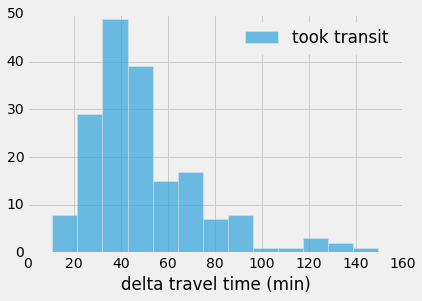

In [3]:
# Get rows where both drive and walk to transit are available
transit_drive_avail = mc.where('availability_drive_alone',1).where('availability_walk_transit_walk',1)


# Store the rows for trips taken in transit in a table called took_transit
took_transit = transit_drive_avail.where('choice','wTrnW')

# Your task: Create a table called drove and store the rows for where choice = 'da'
## drove = transit_drive_avail.where('choice','da')


# Compute the difference in travel time for people who took transit
chose_wtw_tt_delta = (took_transit.column('total_travel_time_walk_transit_walk')-
                      took_transit.column('total_travel_time_drive_alone'))
# Your task: Compute the difference in travel time for people who drove
## chose_drive_tt_delta = (drove.column('total_travel_time_walk_transit_walk')
##                         -drove.column('total_travel_time_drive_alone'))

# Create histograms of the differences:
my_bins = np.linspace(0,160,16)
plt.hist(chose_wtw_tt_delta, alpha=.7, bins=my_bins, label = 'took transit')

# Your task: Add the chose_drive_tt_delta histogram here. 
# Make sure to label it appropriately and use the same bins as transit
## plt.hist(chose_drive_tt_delta, alpha=.7, bins=my_bins, label='drove')
plt.legend()
plt.xlabel('delta travel time (min)')


In [4]:
# your answers here

## Comparing travel time and cost
People are likely not only considering travel time when they select a travel mode, they are probably also considering the cost of each mode. People are more likely to drive if driving is  cheaper than transit or the travel time is significantly lower than public transit. Note driving costs include fixed per mile rate divided evenly among passengers, and tolls. It does not include parking and other car ownership related costs.

Below is a scatter plot showing delta travel time (drive time-transit time) on the x-axis vs. delta travel cost (drive cost-transit cost) on the y-axis for people who chose to take transit. 

**Task 2:** Create a scatter plot of delta travel time vs. delta travel cost for **people who chose to drive**. Make this scatter plot **red** and overlay it on the scatter plot of delta travel time vs. delta travel cost for people who took tranist. 

**Question 3:** A traveler wants to make a trip from point A to B in SF. The delta travel time is 25 minutes. The delta cost is \$1.50. Do you think this scatter plot is useful for predicting their travel mode? Why or why not? If you had to choose, based on the scatter plot, what mode would you guess they would take?

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


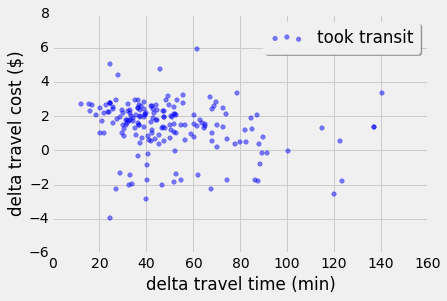

In [5]:
# Compute the cost delta for transit cost vs. drive alone cost for people who took tranist
chose_wtw_cost_delta = (took_transit.column('total_travel_cost_walk_transit_walk')
                        -took_transit.column('total_travel_cost_drive_alone'))

# Your task: Compute the cost delta for transit cost vs. drive alone cost for people who drove
## chose_drive_cost_delta = drove.column('total_travel_cost_walk_transit_walk')-drove.column('cost')


# Create a scatter plot of travel time delta vs. travel cost delta 
# for people who chose to drive.
plt.scatter(chose_wtw_tt_delta, chose_wtw_cost_delta, color='blue', alpha=.5, label = 'took transit')

# Your task: Create a scatter plot of travel time delta vs. travel cost delta 
# for people who chose to drive. Label it 'drove' and color it red
## plt.scatter(chose_drive_tt_delta, chose_drive_cost_delta, color='red', alpha=.5, label='drove')

plt.xlabel('delta travel time (min)')
plt.ylabel('delta travel cost ($)')
plt.legend(shadow=True)

## Bike vs transit travel time comparison
If both bicycling and transit are feasible travel options, a traveler may consider the travel time of each mode when making a travel mode decision

**Task 3:** Similar to what we did in the drive vs. transit travel time comparison above, compare delta travel time histograms for users who chose bike and users who chose walk to transit. Follow the steps below:
<ol><li>Find rows where both bike and walk to transit are available modes <li>Store rows for travelers who biked in one table, and for those who took transit in another <li>Compute delta travel time (transit travel time - bike travel time) for each group <li>Create two overlayed histograms with a legend and appropriate axis labels

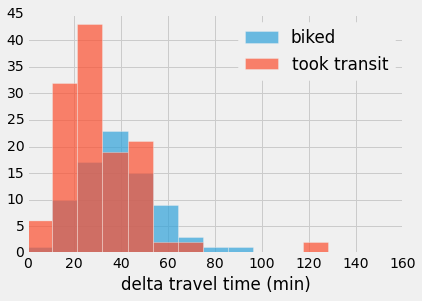

In [6]:
# Your code here:

#Answer key:
# Get only columns where both drive and walk to transit are available
transit_bike_avail = mc.where('availability_bicycle',1).where('availability_walk_transit_walk',1)

# Store the rows for trips taken on transit in one Table, the trips for people who drove in another
took_transit = transit_bike_avail.where('choice','wTrnW')
biked = transit_bike_avail.where('choice','bike')

# Compute the difference in travel time 
chose_wtw_tt_delta = took_transit.column('total_travel_time_walk_transit_walk')-took_transit.column('total_travel_time_bicycle')
chose_bike_tt_delta = biked.column('total_travel_time_walk_transit_walk')-biked.column('total_travel_time_bicycle')

# Create histograms of the differences:
my_bins = np.linspace(0,160,16)
plt.hist(chose_bike_tt_delta, alpha=.7, bins=my_bins, label='biked')
plt.hist(chose_wtw_tt_delta, alpha=.7, bins=my_bins, label = 'took transit')
plt.legend()
plt.xlabel('delta travel time (min)')

## Adding demographic data:
Different demographics may have different mode preferences. For example people in the 20-44 may be more likely to bike then people over 65. 

**Task 4:** Create a [pivot](http://data8.org/datascience/_autosummary/datascience.tables.Table.pivot.html?highlight=pivot#datascience.tables.Table.pivot) table where we count the number of people who choose each mode per age_ctgry. Create a [barh](http://data8.org/datascience/_autosummary/datascience.tables.Table.barh.html#datascience.tables.Table.barh) graph to visualize the results.

**Question 4a:** Which age group is most likely to have a shared ride. Which age group shows the strongest preference for drive alone?

**Question 4b:** If we knew that the traveler mentioned in question 3 was 53 years old, does your answer to question 3 change? Do you think the traveler is now more likely or less likely to drive than you previously predicted?

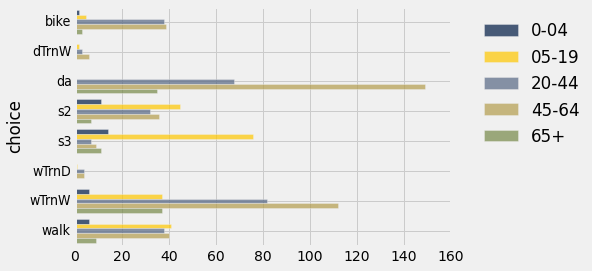

In [7]:
# Your code here:

#Answer key:
mc_pivot = mc.pivot('age_ctgry','choice')

mc_pivot.barh('choice')

In [ ]:
# Your answer here